In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from config import Archive_Path
from os.path import join
from glob import glob
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf
from datetime import datetime
from matplotlib import interactive
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve

# Statistical Analysis of the SD of the background

### Load Model

In [4]:
model = keras.models.load_model(filepath="/mnt/c/Users/migue/Desktop/estagio_lip/Monotop/ML/models/09/08/2020-21:28:49")


In [5]:
Names = [os.path.basename(x) for x in glob(join(Archive_Path,"*/*.csv"), recursive=True)]

In [9]:
def stats(apply_cuts=True):
    full_data = pd.concat([pd.read_hdf(join(Archive_Path, "Data.h5"), key='BKG'), pd.read_hdf(join(Archive_Path, "Data.h5"), key='SIGNAL')])



    # Criar os plots
    num_cols = 4
    num_rows = int(np.ceil((len(list(Names))) / num_cols))
    fig, ax = plt.subplots(num_rows, num_cols, figsize=(40, 10))

    for i,x in enumerate(Names):
        data = full_data[full_data['Name'] == x]

        # Split the data to remove the data that was used to train the model
        X_train, data, y_train, labels = train_test_split(data.drop(columns=['Label']), data['Label'], test_size=1/3, random_state=42)

        del X_train
        del y_train

        # Predict!
        predictions = np.stack([model.predict(data.drop(columns=['Name','Weights']).to_numpy(), batch_size=1024) for samples in range(100)]).reshape(100,-1)#.mean(axis=0)



        # Give Results!
        print("\n")
        print("Name:",x,i)
        print("Accuracy:",accuracy_score(labels.values, predictions.mean(axis=0).round()))
        print("Standard Deviation:", predictions.mean(axis=0).mean())

        # Plotting
        row, col = int(i/num_cols), i%num_cols
        i +=1

        ax[row, col].set_title(x)
        ax[row, col].set_yscale('log')
        
        ax[row, col].hist(predictions.std(axis=0), label=x, weights=data['Weights'])
        
        ax[row, col].autoscale(enable=True) 
        ax[row, col].legend()

    plt.show()







Name: Background_ttbar_FullyHadronic.csv 0
Accuracy: 0.9999625163522413
Standard Deviation: 5.1490508e-05


Name: Background_Wjets_FullyHadronic.csv 1
Accuracy: 1.0
Standard Deviation: 3.081487e-05


Name: Background_WW_FullyHadronic.csv 2
Accuracy: 0.9999586623124302
Standard Deviation: 9.208673e-05


Name: Background_Zjets_FullyHadronic.csv 3
Accuracy: 1.0
Standard Deviation: 1.1776669e-05


Name: Background_ZW_FullyHadronic.csv 4
Accuracy: 0.9997984114824819
Standard Deviation: 0.00021144428


Name: Background_ZZ_FullyHadronic.csv 5
Accuracy: 0.9999600575171753
Standard Deviation: 5.0895072e-05


Name: MonoTop_ResonantModel.csv 6
Accuracy: 0.8661251669319283
Standard Deviation: 0.8579638


Name: MonoTop_ResonantModel_15.csv 7
Accuracy: 0.865916469353382
Standard Deviation: 0.85796744


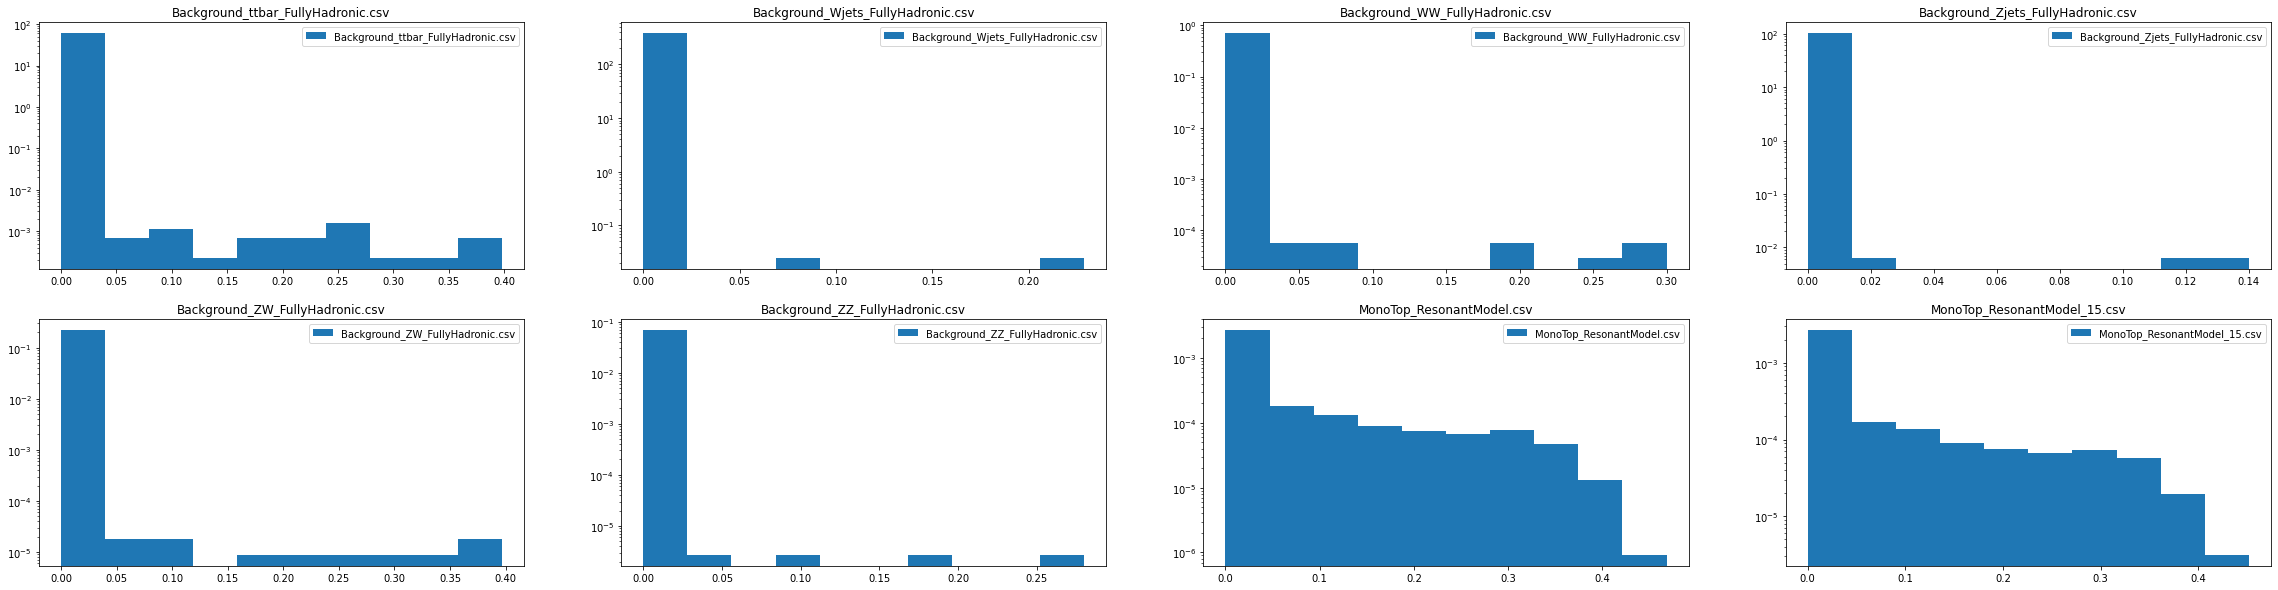

In [10]:
stats()

In [8]:
#A função acima esta a fazer cheating pois tem la dentro dados do training!
#Falta ajustar a machine_learning_model visto que adicionei nova coluna com os nomes